# <font color="orange"><center>Projet Annuel : Prédiction de note de films</center></font>

Dans le cadre de la 3ème année de bachelor en Intelligence Artificielle et Big Data, un projet ayant pour objectif d'implémenter des modèles et algorithmes lié au Machine Learning nous a été confié.

# Problématique choisie



## Choix du sujet
Le sujet choisit par notre groupe est celui permettant de prédire la note (IMDB) d'un film en fonction de différents paramètres

## <center>Constitution du dataset</center>

Afin de créer le dataset utilisé pour nos modèles, on s'est rendu sur le [site](https://www.imdb.com/interfaces/ "IMDb Datasets") où on a choisit de garder uniquement les archives
*name.basics.tsv, title.basics.tsv, title.principals.tsv* ainsi que *title.ratings.tsv*

1. Nettoyage du dataset

Le dataset étant très volumineux, il a fallu effectuer énormément de preprocessing notamment en ce qui concerne les titres des films, en effet dans le dataset le fait que certains films aient des titres contenant des virgules ont rendu la tâche plutôt compliquée.

Pour formatter les fichiers volumineux, la commande `sed` permettant de modifier des fichiers textes. Cette commande a été particulièrement utile afin de reformatter les fichiers et ainsi éliminer les lignes erronés.




Ensuite une base de données mySQL a été créé afin de manipuler de façon plus aisée les information liés aux films. Pour le projet, on s'est servis uniquement des fichiers les titres des films, des réalisateurs, des acteurs, des équipes et des notes associés.

Après cela la requête SQL qui suit a été conçu afin de récupérer les films qui seront utilisés plus tard.


```sql
SELECT t.titleType, t.primaryTitle, t.originalTitle, d.primaryName director, w.primaryName writer, a.primaryName, t.startYear, t.runtimeMinutes, t.genres, r.averageRating, r.numVotes
FROM title t, name d, name w, name a, crew cr, credits c, ratings r
WHERE t.tconst = cr.tconst
AND c.tconst = t.tconst
AND c.nconst = a.nconst
AND t.isAdult = 0
AND c.category = 'actor'
AND d.nconst = cr.directors
AND r.tconst = t.tconst
AND w.nconst = cr.writers
AND t.runtimeMinutes IS NOT NULL AND t.genres IS NOT NULL AND t.startYear IS NOT NULL
GROUP BY t.tconst;
```

Extrait de code permettant d'encoder le dataset l'aide de la fonction  ```LabelEncoder``` de la bibliothèque ```sklearn.preprocessing``` 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

lbl_encoder = LabelEncoder()
dataset = pd.read_csv('categorical_dataset.csv')
dataset = dataset[~dataset['genres'].str.contains('Adult')]

dataset['genres'] = lbl_encoder.fit_transform(dataset['genres'])

dataset[['startYear', 'genres', 'numVotes']].to_csv('dataset.csv', index=None)

***

# <center>Régression</center>

# Modèle Linéaire

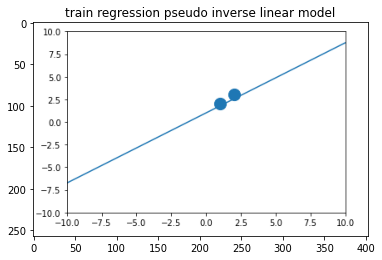

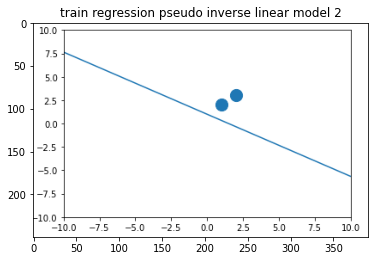

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/Maathess/Desktop/Projet_annuel_test/img/train_regression_pseudo_inverse_linear_model.PNG')
imgplot = plt.imshow(img)
plt.title('train regression pseudo inverse linear model')
plt.show()


img = mpimg.imread('C:/Users/Maathess/Desktop/Projet_annuel_test/img/train_regression_pseudo_inverse_linear_model2.PNG')
imgplot = plt.imshow(img)
plt.title('train regression pseudo inverse linear model 2')
plt.show()

# Perceptron Multi Couches

Très sensible à l'underfitting

L'overfitting n'a pas pu être tester, car nous avons été obligé de travailler avec les mêmes datasets vu que l'on a pas une implémentation "efficace' pour le PMC sur la note des films. 

***

# Performances des algorithmes (entrainement)


## Impact des paramètres


Dans le dataset que l'on a constitué, le champs **'numVote'** (cf. plot ci-dessous), semble être un très bon paramètre pour l'apprentissage sur nos différents modèles.


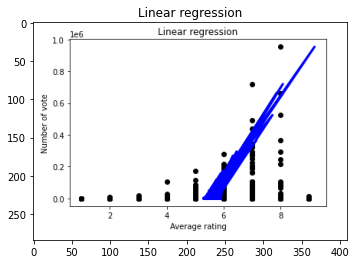

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/Maathess/Desktop/Projet_annuel_test/img/Number of vote.PNG')
imgplot = plt.imshow(img)
plt.title('Linear regression')
plt.show()

## Étude de la rapidité des différents paramètres

# Justesse de l'implémentation

# Mise en évidence du biais dans la base d'exemple

In [7]:
import pandas as pd
data1 = pd.read_csv("./dataset.csv")
data2 = pd.read_csv("./movie_metadata.csv")

In [8]:
data1

,startYear,genres,numVotes
0,1906,3,630
1,1907,647,5
2,1911,647,6
3,1911,647,61
4,1912,724,6
...,...,...,...
85122,2019,724,20
85123,2019,647,41
85124,2019,534,46
85125,2020,412,160


In [10]:
data2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


***

# Difficultés concernant la recherche d'un modèle correspondant au mieux aux besoins du projet